In [28]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['figure.dpi'] = 150  # plt.show display resolution
font = {'family': 'sans-serif',
        'serif': 'Helvetica',
        'weight': 'normal',
        'size': 21}
plt.rc('font', **font)
plt.rcParams['axes.linewidth'] = 2

{'network': [75.99999999999909, 90.0000000000012, 117.99999999999926], 'display': [45.999999999999375, 57.99999999999868, 56.00000000000094], 'total': [121.99999999999847, 147.99999999999986, 174.0000000000002]}
{'network': [16.00000000000037, 39.99999999999693, 38.000000000000966], 'display': [15.999999999998238, 27.99999999999754, 25.9999999999998], 'total': [22.000000000000597, 57.99999999999645, 53.999999999999204]}
{'network': [14.000000000000767, 69.9999999999985, 71.99999999999847], 'display': [23.999999999997357, 41.99999999999564, 44.00000000000048], 'total': [17.99999999999855, 71.99999999999989, 55.999999999996675]}


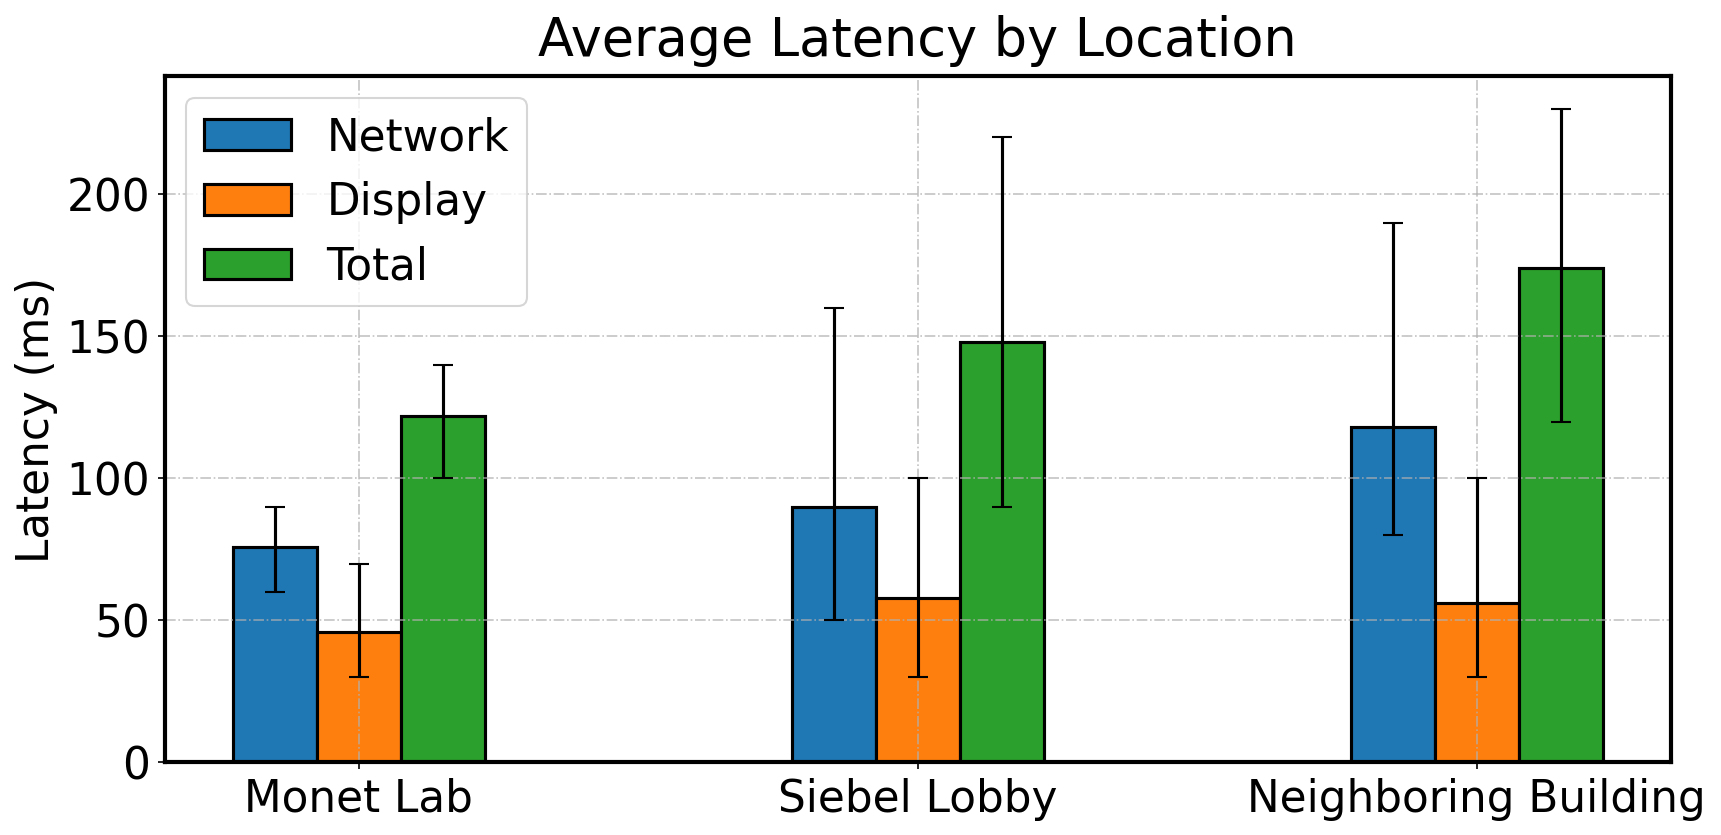

In [29]:
data = {
    "Monet Lab": [
        [(57, 68), (57, 59), (57, 56)],
        [(25, 31), (25, 25), (25, 21)],
        [(28, 15), (28, 8), (28, 2)],
        [(30, 2), (29, 93), (29, 90)],
        [(31, 65), (31, 58), (31, 51)]
    ],
    "Siebel Lobby": [
        [(52, 28), (52, 23), (52, 19)],
        [(56, 49), (56, 42), (56, 39)],
        [(0, 5), (59, 98), (59, 88)],
        [(4, 10), (3, 94), (3, 88)],
        [(9, 22), (9, 12), (9, 6)]
    ],
    "Neighboring Building": [
        [(18, 59), (18, 51), (18, 47)],
        [(25, 40), (25, 21), (25, 17)],
        [(26, 67), (26, 56), (26, 49)],
        [(27, 66), (27, 55), (27, 45)],
        [(29, 63), (29, 53), (29, 50)]
    ]
}

# Convert to float seconds and compute stage latencies (compute -> receive -> display)
def compute_latencies(location_data):
    stage_latencies = {'network': [], 'display': [], 'total': []}
    for row in location_data:
        times = [s + cs / 100.0 for s, cs in row]
        for i in range(len(times)-1):
            if times[i] < times[i+1]:
                # Add 60 if we are in the next minute
                times[i] += 60

        network_latency = times[0] - times[1]
        display_latency = times[1] - times[2]

        stage_latencies['network'].append(network_latency)
        stage_latencies['display'].append(display_latency)
        stage_latencies['total'].append(display_latency + network_latency)
    return stage_latencies

# Process all data
results = {}
for loc, dat in data.items():
    results[loc] = compute_latencies(dat)

labels = ['Monet Lab', 'Siebel Lobby', 'Neighboring Building']
stages = ['network', 'display', 'total']

avg_latencies = {stage: [] for stage in stages}
min_latencies = {stage: [] for stage in stages}
max_latencies = {stage: [] for stage in stages}

latex_rows = []

for loc in labels:
    row = [loc]
    for stage in stages:
        stage_data = results[loc][stage]
        avg = np.mean(stage_data) * 1000  # Convert to ms
        min_val = np.min(stage_data) * 1000
        max_val = np.max(stage_data) * 1000
        avg_latencies[stage].append(avg)
        min_latencies[stage].append(avg - min_val)
        max_latencies[stage].append(max_val - avg)
        row.append(f"{avg:.2f}")

# Plotting
x = np.arange(0, len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(12, 6))
for i, stage in enumerate(stages):
    ax.bar(x + i * width, avg_latencies[stage], width, yerr=[min_latencies[stage], max_latencies[stage]],
    capsize=5, label=stage.capitalize(), edgecolor='black', linewidth=1.5)

print(avg_latencies)
print(min_latencies)
print(max_latencies)

ax.set_ylabel('Latency (ms)')
ax.set_title('Average Latency by Location', pad=10)
ax.set_xticks(x + width)
ax.set_xticklabels(labels)
ax.legend()
plt.grid(True, linestyle='-.', alpha=0.75)
plt.tight_layout()

plt.show()

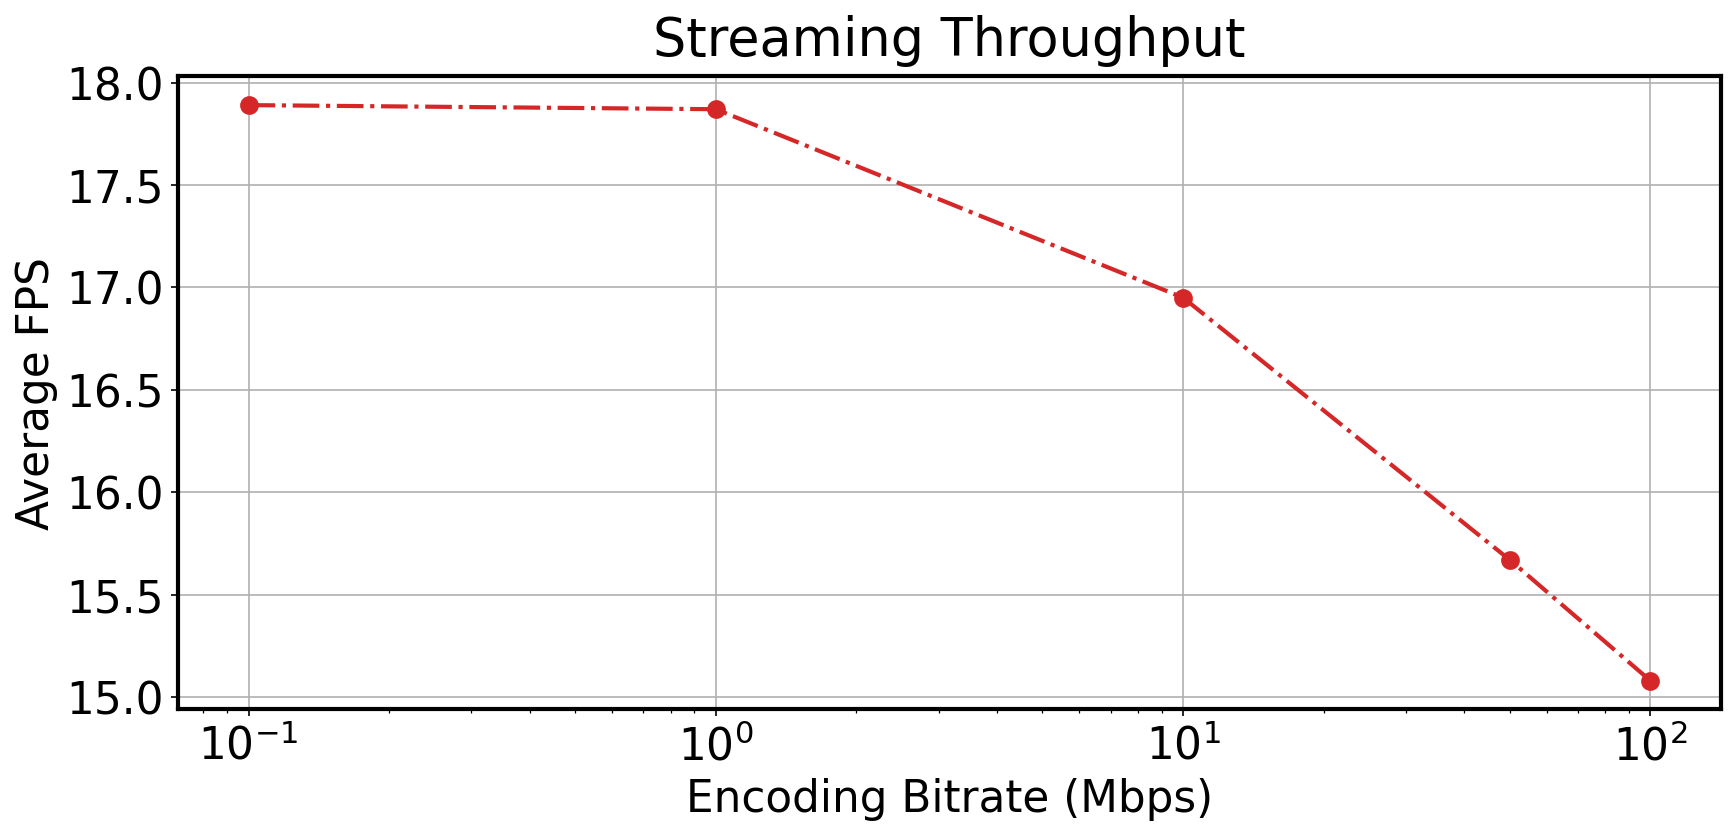

In [32]:
bitrates_mbps = [0.1, 1, 10, 50, 100]
fps = [17.89, 17.87, 16.95, 15.67, 15.08]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(bitrates_mbps, fps, marker='o', linestyle='-.', color='#d62728', linewidth=2, markersize=8)
plt.xscale('log')
plt.xlabel('Encoding Bitrate (Mbps)')
plt.ylabel('Average FPS')
plt.title('Streaming Throughput', pad=10)
plt.grid(True)
# plt.xticks(bitrates_mbps)
plt.tight_layout()
plt.show()